Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

In [1]:
# Python modules
from numpy import linspace, sin, cos, exp, log
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.stats import linregress
from math import pi
from pandas import DataFrame

The fft package we're using is scipy.fftpack

# Fourier coefficients of the fft package

According SciPy Reference Guide the FFT $c[k]$ of length $N$ of the length $N$ sequence $f[n]$ - where the $f_j$ are stored - is given by:
$$c[k] = \sum_{n=0}^{N-1} f[n] e^{-i2\pi \tfrac{kn}{N}}$$

Hence, for a periodic array $f_j$ with $j=0,1,\ldots,N-1$ the Fourier coefficients our package returns are $$c_k = \sum_{j=0}^{N-1} f_j e^{-i2\pi k \tfrac{j}{N}}$$
for $k=0,\ldots,N-1$.

We can check this for the data in Problem 5.

In [2]:
# Checking Fourier coefficients from fft package
# INPUT: fj_5 (values of f from P5)
# OUTPUT: Corresponding Fourier coefficients
# Carles Falcó i Gandia
# 28/11/18

fj_5 = [6.000000000000000,
10.242640687119284,
2.000000000000000,
-2.585786437626905,
2.000000000000000,
1.757359312880716,
-6.000000000000000,
-5.414213562373098]

ck1 = []
for i in range(0,len(fj_5)):
    l1 = [fj_5[k]*(cos(2*pi*i*k/len(fj_5)) - sin(2*pi*i*k/len(fj_5))*1j)
          for k in range(0,len(fj_5))]
    ck1.append(sum(l1))
data1 = {'$c_k$':ck1,'FFTpack $c_k$':fft.fft(fj_5)}
DataFrame(data1)

,$c_k$,FFTpack $c_k$
0,(8+0j),(8+0j)
1,(8-16j),(8-16j)
2,(12-20j),(12-20j)
3,(-3.10862446895e-15-1.33226762955e-15j),(3.10862446895e-15+8.881784197e-16j)
4,(2.6645352591e-15+3.21765781659e-16j),(3.5527136788e-15+0j)
5,(1.33226762955e-14+3.10862446895e-15j),(3.10862446895e-15-8.881784197e-16j)
6,(12+20j),(12+20j)
7,(8+16j),(8+16j)


As expected, we have the same Fourier coefficients regardless accuracy errors.

# Inverse DFT

Again, according SciPy Reference Guide we have that the expression that define the inverse DFT is:
$$f_j = \frac{1}{N}\sum_{k = 0}^{N-1}c_ke^{i2\pi j \tfrac{k}{N}}$$

This can be found at: https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html. A rapid check shows that:

In [3]:
# Recovering initial data
fft.ifft(fft.fft(fj_5))

array([  6.00000000 +0.00000000e+00j,  10.24264069 -6.39228607e-16j,
         2.00000000 +0.00000000e+00j,  -2.58578644 +3.06161700e-16j,
         2.00000000 +0.00000000e+00j,   1.75735931 +2.69052076e-17j,
        -6.00000000 +0.00000000e+00j,  -5.41421356 +3.06161700e-16j])

# Proving that
$f_j\in\mathbb{R}\;\forall j = 0,\ldots,N-1\;\implies c_0\in\mathbb{R},\;c_{N-k} = \bar{c_k}$

Given $\omega_N^k = e^{-ik2\pi/N}$ for $k=0,\ldots,N-1$ we'll prove first that $\omega_N^{N-k}=\bar{\omega_N}^k$ where the $\bar{}$ denotes the complex conjugate. That's easy:
$$\omega_N^{N-k}= e^{-i(N-k)2\pi/N} = e^{ik2\pi/N}e^{-i2\pi} = \overline{\omega_N^k} = \bar{\omega_N}^k$$

Now we have for $c_0$:
$$c_0=\frac{1}{N}\sum_{j=0}^{N-1} f_j \omega_N^0 = \frac{1}{N}\sum_{j=0}^{N-1} f_j \in\mathbb{R}$$ since all $f_j$ are real.

And if $c_k$ for $k=0,\ldots,N-1$ follows:
$$c_k = \frac{1}{N}\sum_{j=0}^{N-1} f_j \omega_N^k$$ its complex conjugate is:
$$\bar{c_k} = \frac{1}{N}\overline{\sum_{j=0}^{N-1} f_j \omega_N^k}= \sum_{j=0}^{N-1} \overline{f_j \omega_N^k} = \sum_{j=0}^{N-1} f_j \bar{\omega_N}^k = \sum_{j=0}^{N-1} f_j \omega_N^{N-k} = c_{N-k}$$
as we wanted to prove.
# Relating Fourier coefficients $c_k$ with $a_k$ and $b_k$ 

The interpolating trigonometric polynomial has the form:
$$P_N(x) = \frac{a_0}{2} + \sum_{k = 1}^{N/2-1} (a_k\cos(kx)+b_k\sin(kx)) +\frac{a_{N/2}}{2}\cos\Big(\frac{N}{2}x\Big)$$

Using $e^{ix} = \cos(x) + i\sin(x)$ and $e^{-ix} = \cos(x) - i\sin(x)$ we can write:
$$\sin(x)= \frac{e^{ix}+e^{-ix}}{2}$$
$$\cos(x)= i\frac{e^{-ix}-e^{ix}}{2}$$
and the sum becomes:
$$\sum_{k = 1}^{N/2-1} (a_k\cos(kx)+b_k\sin(kx)) = \sum_{k = 1}^{N/2-1} \bar{c}_k e^{-ikx} +c_ke^{ikx}$$ where $c_k = \tfrac{1}{2} (a_k-ib_k)$. Now making $c_0 = a_0$ and $c_{-k} = \bar{c}_k$ one can write:
$$P_N(x)= \sum_{k = -N/2}^{N/2}'' c_k e^{ikx}$$ where the double prime in the sum only means that the first and the last terms in the sum have a factor $1/2$. Then we have $$a_k = 2\Re(c_k),\;\;b_k = -2\Im(c_k)$$

But, remember that the expression for the $c_k$ that the fft package computes is actually $Nc_k$. If we call $c_k$ the coefficients the package computes we'll have:
$$a_k = 2\frac{\Re(c_{k})}{N},\;\;b_k = -2\frac{\Im(c_{k})}{N}$$

# $P_8(x)$ for the periodic array on $[0,2\pi]$:

In [4]:
data2 = {'$f_j$':fj_5}
DataFrame(data2)

,$f_j$
0,6.000000
1,10.242641
2,2.000000
3,-2.585786
4,2.000000
5,1.757359
6,-6.000000
7,-5.414214


In [5]:
# Computing Fourier coefficients ak,bk
# INPUT: fj (periodic array)
# OUTPUT: [A,B] (lists of coefficients)
# Carles Falcó i Gandia
# 30/11/18

def fourier_coef(fj):
    C = fft.fft(fj)
    A = []
    B = []
    for x in C:
        A.append(2*x.real/len(fj))
        B.append(-2*x.imag/len(fj))
    return [A,B]

# Evaluating interpolating trigonometric polynomial
# INPUT: fj (periodic array), x (variable)
# OUPUT: P_len(fj) (x)
# Carles Falcó i Gandia
# 30/11/18

def inter_trig_poly(fj,x):
    N_2 = int( len(fj)/2 ) # N/2
    A = fourier_coef(fj)[0][:N_2+1]
    B = fourier_coef(fj)[1][:N_2+1]
    l = [ A[k]*cos(k*x) + B[k]*sin(k*x) 
         for k in range(1,len(A)-1) ]
    return A[0]/2 + sum(l) + A[-1]/2*cos(N_2*x)

# Same function but vectorised
# More efficient for plots, we compute ak,bk just once
# Carles Falcó i Gandia
# 30/11/18

def inter_trig_poly_vect(fj,x):
    N_2 = int( len(fj)/2 ) # N/2
    A = fourier_coef(fj)[0][:N_2+1]
    B = fourier_coef(fj)[1][:N_2+1]
    y = []
    for z in x:
        l = [ A[k]*cos(k*z) + B[k]*sin(k*z) 
             for k in range(1,len(A)-1) ]
        y.append(A[0]/2 + sum(l) + A[-1]/2*cos(N_2*z))
    return y

Now we have a function capable of computing $P_8(x)$. If we plot it: 

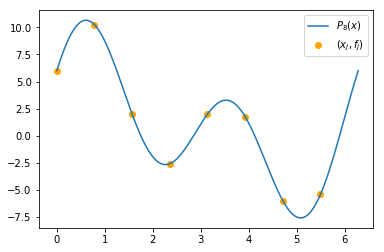

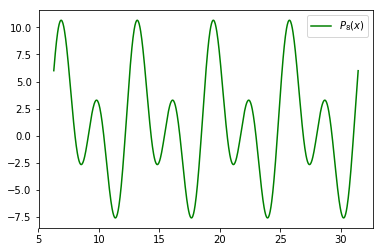

In [6]:
# Plotting P_8(x) and data
t_5bis = linspace(0,2*pi,1000)
t_5 = linspace(0,2*pi,9)
plt.plot(t_5bis,inter_trig_poly_vect(fj_5,t_5bis),
         label='$P_8(x)$')
plt.scatter(t_5[:8],fj_5,color='orange',
            label='$(x_j,f_j)$')
plt.legend()
plt.show()

# Plotting P_8, cheking periodicity
t_5bis2 = linspace(2*pi,10*pi,800)
plt.plot(t_5bis2,inter_trig_poly_vect(fj_5,t_5bis2),
         label='$P_8(x)$',color='green')
plt.legend()
plt.show()

# $P_8(x)$ and $P_8'(x)$ for $f(x)=e^{\sin(x)}$
taking equispaced points $x_j = j\tfrac{2\pi}{N}$ for $j=0,\ldots,N-1$ and $N=8$. First we'll obtain and plot $P_8(x)$. The $f_j$ are shown in the following table.

In [7]:
# fj for e^sin(x)
# Carles Falcó i Gandia
# 01/12/18
N = 8
xj_6 = linspace(0,2*pi,N+1)[:N]
data6 = {'$f_j$':exp(sin(xj_6))}
DataFrame(data6)

,$f_j$
0,1.000000
1,2.028115
2,2.718282
3,2.028115
4,1.000000
5,0.493069
6,0.367879
7,0.493069


Now, $P_8(x)$ can be computed using $\texttt{inter_trig_poly(fj_6,x)}$. If we plot it:

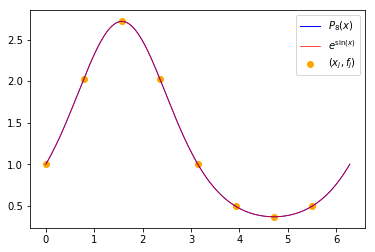

In [8]:
# Plotting P_8, (x_j,f_j), and e^sin(x)
# Carles Falcó i Gandia
# 01/12/18

x_6 = linspace(0,2*pi,200)
plt.scatter(xj_6,exp(sin(xj_6)), color = 'orange',
        label = '$(x_j,f_j)$')
plt.plot(x_6,inter_trig_poly_vect(exp(sin(xj_6)),x_6), 
         color = 'blue', label = '$P_8(x)$',linewidth = .99)
plt.plot(x_6,exp(sin(x_6)),color = 'red',
        label = '$e^{\sin(x)}$',linewidth = .7)
plt.legend()
plt.show()

We observe that for $N=8$ the plots of $P_8(x)$ and $e^{\sin(x)}$ overlap.

The derivative of $f(x)=e^{\sin(x)}$ is:
$$f'(x)= \cos(x) e^{\sin(x)}$$

But we can compute an spectral approximation of $f'(x)$ at $x_j$ by computing $P'(x_j)$. We'll compute the actual error, up to 16 digits of accuracy by doing $\epsilon = |P_8'(x_j)-f'(x_j)|$. We compute $P_8'(x)$ by using that the new Fourier coefficients are simply $ikd_k$.

In [9]:
# Computing Fourier coefficients ak,bk for P'_N(x)
# INPUT: fj (periodic array)
# OUTPUT: [A,B] (lists of coefficients)
# Carles Falcó i Gandia
# 01/12/18

def diff_fourier_coef(fj):
    C = fft.fft(fj)
    A = []
    B = []
    k = 0
    for x in C:
        A.append(-2*k*x.imag/len(fj))
        B.append(-2*k*x.real/len(fj))
        k = k + 1
    return [A,B]

# Derivative of interpolating trigonometric polynomial
# INPUT: fj (periodic array), x (variable)
# OUTPUT: P_len(fj)'(x)
# Carles Falcó i Gandia
# 01/12/18


def diff_inter_trig_poly(fj,x):
    N_2 = int( len(fj)/2 ) # N/2
    A = diff_fourier_coef(fj)[0][:N_2+1]
    B = diff_fourier_coef(fj)[1][:N_2+1]
    l = [ A[k]*cos(k*x) + B[k]*sin(k*x) 
         for k in range(1,len(A)-1) ]
    return A[0]/2 + sum(l) + A[-1]/2*cos(N_2*x)

# Same function but vectorised
# More efficient for plots, we compute ak,bk just once
# Carles Falcó i Gandia
# 01/11/18

def diff_inter_trig_poly_vect(fj,x):
    N_2 = int( len(fj)/2 ) # N/2
    A = diff_fourier_coef(fj)[0][:N_2+1]
    B = diff_fourier_coef(fj)[1][:N_2+1]
    y = []
    for z in x:
        l = [ A[k]*cos(k*z) + B[k]*sin(k*z) 
             for k in range(1,len(A)-1) ]
        y.append(A[0]/2 + sum(l) + A[-1]/2*cos(N_2*z))
    return y

In [10]:
# P_8'(x_j), actual f'(x_j), actual error
# Up to 16 digits of accuracy
data_62 = {"$P_8'(x_j)$":diff_inter_trig_poly_vect(exp(sin(xj_6)),xj_6), 
          "$f'(x_j)$":cos(xj_6)*exp(sin(xj_6)),
           "Error":
           abs(diff_inter_trig_poly_vect(exp(sin(xj_6)),xj_6) -
                         cos(xj_6)*exp(sin(xj_6)))
          }
DataFrame(data_62)

,$P_8'(x_j)$,$f'(x_j)$,Error
0,9.956821e-01,1.000000e+00,4.317911e-03
1,1.437543e+00,1.434094e+00,3.449100e-03
2,4.943096e-17,1.664468e-16,1.170158e-16
3,-1.437543e+00,-1.434094e+00,3.449100e-03
4,-9.956821e-01,-1.000000e+00,4.317911e-03
5,-3.513817e-01,-3.486522e-01,2.729471e-03
6,2.871168e-17,-6.757836e-17,9.629004e-17
7,3.513817e-01,3.486522e-01,2.729471e-03


If we plot both $P_8'(x)$ and $f'(x)$ we see that they are almost indistinguishable.

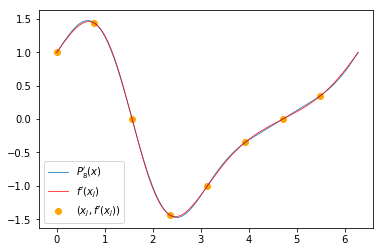

In [11]:
# Plotting P_8'(x), f'(x), (x_j,f_j)
# Carles Falcó i Gandia
# 01/12/18

plt.plot(x_6,diff_inter_trig_poly_vect(exp(sin(xj_6)),x_6),
         label = "$P_8'(x)$",linewidth=0.8)
plt.plot(x_6,cos(x_6)*exp(sin(x_6)), color ='red',
         label = "$f'(x_j)$", linewidth = 0.7)
plt.scatter(xj_6,cos(xj_6)*exp(sin(xj_6)),
            label = "$(x_j,f'(x_j))$",color='orange')
plt.legend()
plt.show()

# Finding $P_N'(x_j)$ using one DFT and one inverse DFT

(a) We'll write a code to compute an approximation to the value of the derivative using one DFT and one inverse DFT in order $N\log_2N$ operations.

In [12]:
# Spectral approximation to f'(x_j)
# INPUT: fj (periodic array)
# OUTPUT: f'(x_j)
# Carles Falcó i Gandia
# 01/12/18

def approx_f_diff(fj):
    N_2 = int(len(fj)/2)
    c = fft.fft(fj)
    for k in range(0,N_2):
        c[k] = 1j*k*c[k] # correspoding to k in (0,N/2)
    for k in range(N_2+1,len(c)):
        c[k] = 1j*(k-len(fj))*c[k] # correspoding to k in (-N/2,0)
    c[N_2] = 0 #corresponding to k = 0
    return fft.ifft(c).real # imaginary part ~ 1e-16

(b) Now we can test it with the previous problem. We observe that the errors obtained are of the same order of magnitude.

In [13]:
data_7 = {"$P_8'(x_j)$ (P7)":approx_f_diff(exp(sin(xj_6))),
          "$P_8'(x_j)$ (P6)":diff_inter_trig_poly_vect(exp(sin(xj_6)),xj_6), 
    "$f'(x_j)$":cos(xj_6)*exp(sin(xj_6)),
           "Error (P7)":
           abs(approx_f_diff(exp(sin(xj_6))) -
                         cos(xj_6)*exp(sin(xj_6))),
          "Error (P6)":
           abs(diff_inter_trig_poly_vect(exp(sin(xj_6)),xj_6) -
                         cos(xj_6)*exp(sin(xj_6)))
          }
DataFrame(data_7)

,$P_8'(x_j)$ (P6),$P_8'(x_j)$ (P7),$f'(x_j)$,Error (P6),Error (P7)
0,9.956821e-01,9.956821e-01,1.000000e+00,4.317911e-03,4.317911e-03
1,1.437543e+00,1.437543e+00,1.434094e+00,3.449100e-03,3.449100e-03
2,4.943096e-17,-1.110223e-16,1.664468e-16,1.170158e-16,2.774691e-16
3,-1.437543e+00,-1.437543e+00,-1.434094e+00,3.449100e-03,3.449100e-03
4,-9.956821e-01,-9.956821e-01,-1.000000e+00,4.317911e-03,4.317911e-03
5,-3.513817e-01,-3.513817e-01,-3.486522e-01,2.729471e-03,2.729471e-03
6,2.871168e-17,1.110223e-16,-6.757836e-17,9.629004e-17,1.786007e-16
7,3.513817e-01,3.513817e-01,3.486522e-01,2.729471e-03,2.729471e-03


(c) Now we can see how the error behaves when we increase $N = 16,32$

In [14]:
# Equispaced points
# INPUT: n
# OUTPUT: array from 0 to 2*pi with equispaced points
# Carles Falcó i Gandia
# 01/12/18

def xj_7(n):
    return linspace(0,2*pi,n+1)[:n]

# Comparing errors

data_72 = {"Error ($N = 8$)":
           abs(approx_f_diff(exp(sin(xj_7(8)))) -
                         cos(xj_7(8))*exp(sin(xj_7(8))))}
data_73 = {"Error ($N = 16$)":
           abs(approx_f_diff(exp(sin(xj_7(16)))) -
                         cos(xj_7(16))*exp(sin(xj_7(16))))}
data_74 = {"Error ($N = 32$)":
           abs(approx_f_diff(exp(sin(xj_7(32)))) -
                         cos(xj_7(32))*exp(sin(xj_7(32))))}
DataFrame(data_72)

,Error ($N = 8$)
0,4.317911e-03
1,3.449100e-03
2,2.774691e-16
3,3.449100e-03
4,4.317911e-03
5,2.729471e-03
6,1.786007e-16
7,2.729471e-03


In [15]:
DataFrame(data_73)

,Error ($N = 16$)
0,1.761893e-07
1,1.692058e-07
2,1.339584e-07
3,7.419313e-08
4,2.966909e-16
5,7.419313e-08
6,1.339584e-07
7,1.692058e-07
8,1.761893e-07
9,1.567806e-07


In [16]:
DataFrame(data_74)

,Error ($N = 32$)
0,2.220446e-16
1,0.000000e+00
2,2.220446e-16
3,1.332268e-15
4,1.554312e-15
5,2.442491e-15
6,2.442491e-15
7,5.551115e-16
8,9.464509e-16
9,8.881784e-16


We can use the $||\cdot||_{\infty}$ norm to analyse the behavior of the error.

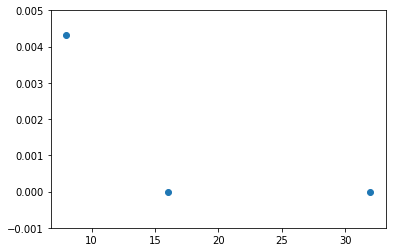

LinregressResult(slope=-19.987312126966636, intercept=37.366605543938775, rvalue=-0.98802436021995665, pvalue=0.098623145642936283, stderr=3.1213822405392078)

In [17]:
# Studying the error(N)
# Carles Falcó i Gandia
# 01/12/18

error8 = abs(approx_f_diff(exp(sin(xj_7(8)))) -
                         cos(xj_7(8))*exp(sin(xj_7(8))))
error16 = abs(approx_f_diff(exp(sin(xj_7(16)))) -
                         cos(xj_7(16))*exp(sin(xj_7(16))))
error32 = abs(approx_f_diff(exp(sin(xj_7(32)))) -
                         cos(xj_7(32))*exp(sin(xj_7(32))))
n = [8,16,32]
maxerror = [max(error8),max(error16),max(error32)]
plt.scatter(n,maxerror)
plt.ylim(-0.001,0.005)
plt.show()

# We take log(error) and log(N) and we find paramers a,b such that:
# log(error) = alog(N) + b
linregress(log(n),log(maxerror))

Then we have that the error goes approximately $\propto N^{-20}$